# Project 1: Comprehensive Regression Analysis

In [102]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 1. Load the Dataset

In [103]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame

In [104]:
print(f"Dataset Shape: {df.shape}")
print("Feature Names:", housing_data.feature_names)

Dataset Shape: (20640, 9)
Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Showing Some Basic Statistics



In [105]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 2. Data Preprocessing

# Calculating Missing Values

In [106]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


feature_cols = [col for col in df.columns if col != 'MedHouseVal']


print("Running Iterative Imputer (MICE)...")
imputer = IterativeImputer(max_iter=10, random_state=42)
df[feature_cols] = imputer.fit_transform(df[feature_cols])

print("Missing values after imputation:")
print(df.isna().sum())

Running Iterative Imputer (MICE)...
Missing values after imputation:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# Splitting the data

In [107]:
# 1. Define X (Features)
# We drop the target 'MedHouseVal' to isolate features
imputer = IterativeImputer(max_iter=10, random_state=42)
X_imputed = imputer.fit_transform(df.drop('MedHouseVal', axis=1))
X = pd.DataFrame(X_imputed, columns=[c for c in df.columns if c != 'MedHouseVal'])

# 2. Define y_log (Target)
# We create the log-transformed target variable here
y = df['MedHouseVal']
y_log = np.log1p(y)

print("Setup Complete.")
print("X shape:", X.shape)
print("y_log shape:", y_log.shape)

Setup Complete.
X shape: (20640, 8)
y_log shape: (20640,)


In [108]:
from sklearn.model_selection import train_test_split

# Note: We use 'y_log' here, NOT 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (16512, 8)
Testing Data Shape: (4128, 8)


# 3. Simple Linear Regression

In [109]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred=regressor.predict(X_test)

In [111]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.050340111728720265
R-squared: 0.600615972280346


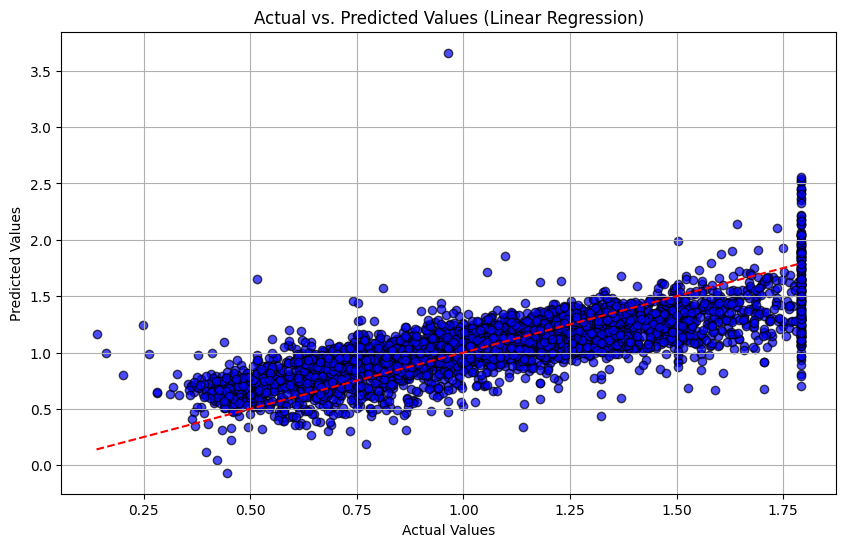

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

#4. Polynomial Regression

In [113]:
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)



LinearRegression()

In [114]:
y_pred_poly = poly_regressor.predict(X_test_poly)

In [115]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r2_poly)

Mean Squared Error (Polynomial Regression): 0.03810141441115243
R-squared (Polynomial Regression): 0.6977142913121506


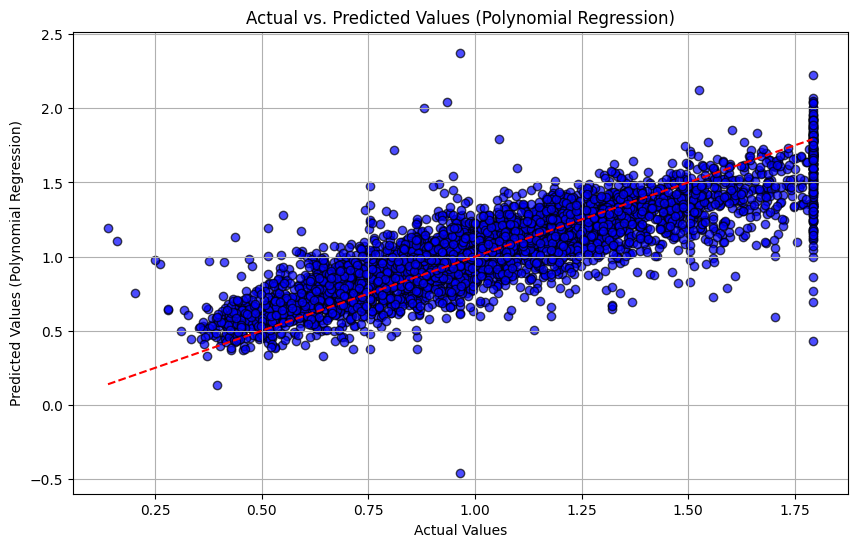

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Polynomial Regression)')
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

# 5. Gradient Descent Methods

## Batch Gradient Descent

In [117]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class BatchGDRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent Loop
        for _ in range(self.epochs):
            # 1. Prediction (y = mx + b)
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # 2. Error Calculation
            errors = y_predicted - y
            
            # 3. Gradient Calculation (The "Batch" part: using ALL samples)
            dw = (2 / n_samples) * np.dot(X.T, errors)
            db = (2 / n_samples) * np.sum(errors)
            
            # 4. Update Weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
        return self

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

#  Stochastic Gradient Descent

Training SGD Regressor...
SGD Mean Squared Error: 0.0499
SGD R² Score: 0.6040


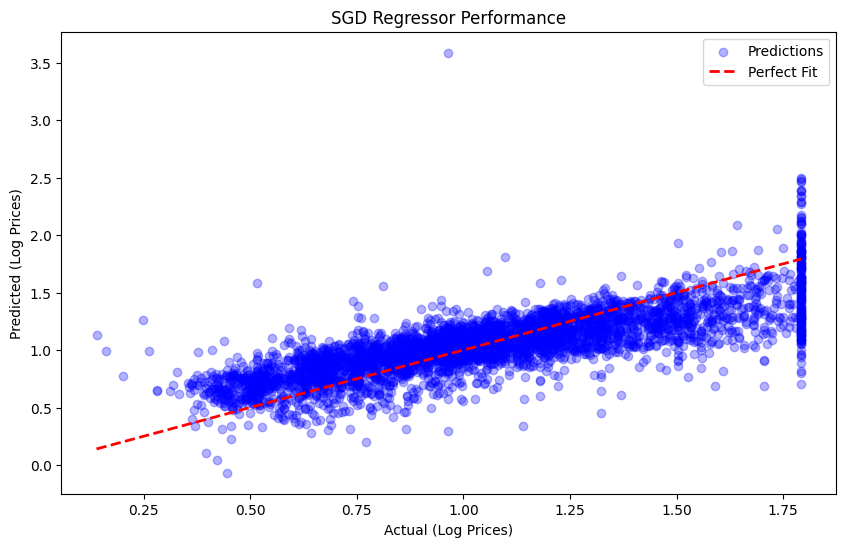

In [118]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Create a Pipeline (Scaler + Model)
# We wrap the model in a pipeline to ensure the scaler is applied correctly to test data too.
sgd_pipeline = make_pipeline(
    StandardScaler(),  # SGD requires data to be centered and scaled (mean=0, var=1)
    SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
)

# 2. Train the Model
print("Training SGD Regressor...")
sgd_pipeline.fit(X_train, y_train)

# 3. Predict
y_pred_sgd = sgd_pipeline.predict(X_test)

# 4. Evaluate
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"SGD Mean Squared Error: {mse_sgd:.4f}")
print(f"SGD R² Score: {r2_sgd:.4f}")

# 5. Visual Check (Observed vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sgd, alpha=0.3, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual (Log Prices)')
plt.ylabel('Predicted (Log Prices)')
plt.title('SGD Regressor Performance')
plt.legend()
plt.show()

# 6. Regularization Techniques (Ridge, Lasso, Elastic Net Regression and Early Stopping)

## Ridge Regression model

In [119]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create a "Smart" Pipeline
# Step A: StandardScaler (Crucial for Ridge!)
# Step B: RidgeCV (Automatically finds the best alpha from the list)
ridge_pipeline = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], scoring='neg_mean_squared_error')
)

# 2. Train (It runs internal Cross-Validation to pick Alpha)
print("Training Ridge Regression with Auto-Tuning...")
ridge_pipeline.fit(X_train, y_train)

# 3. Get the Best Alpha
best_alpha = ridge_pipeline.named_steps['ridgecv'].alpha_
print(f"Best Regularization Strength (Alpha): {best_alpha}")

# 4. Predict & Evaluate
y_pred_ridge = ridge_pipeline.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge MSE: {mse_ridge:.4f}")
print(f"Ridge R²: {r2_ridge:.4f}")

# 5. Insight: Why did we do this?
# If Alpha is large (e.g., 100), it means the model found lots of noise and suppressed it.
# If Alpha is small (e.g., 0.01), it means the linear relationships were already strong.

Training Ridge Regression with Auto-Tuning...
Best Regularization Strength (Alpha): 0.1
Ridge MSE: 0.0503
Ridge R²: 0.6006


## Lasso Regression Model

In [120]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 1. Create Pipeline (Scale -> LassoCV)
# LassoCV will try alphas automatically to find the best balance.
# We increase 'max_iter' because Lasso optimization can be tricky.
lasso_pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5, max_iter=10000, random_state=42)
)

# 2. Train (Auto-Tuning)
print("Training Lasso Regression (Feature Selector)...")
lasso_pipeline.fit(X_train, y_train)

# 3. Predict & Evaluate
y_pred_lasso = lasso_pipeline.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso MSE: {mse_lasso:.4f}")
print(f"Lasso R²: {r2_lasso:.4f}")
print(f"Best Alpha Found: {lasso_pipeline.named_steps['lassocv'].alpha_}")

# 4. The "Portfolio" Insight: Feature Selection
# Lasso drives coefficients to ZERO. Let's see which features survived.
lasso_model = lasso_pipeline.named_steps['lassocv']
coefs = pd.Series(lasso_model.coef_, index=X.columns)

print("-" * 30)
print("Features set to ZERO (Ignored by model):")
print(coefs[coefs == 0].index.tolist())

print("\nTop 5 Most Important Features:")
print(coefs[coefs != 0].abs().sort_values(ascending=False).head(5))

Training Lasso Regression (Feature Selector)...
Lasso MSE: 0.0500
Lasso R²: 0.6031
Best Alpha Found: 0.001
------------------------------
Features set to ZERO (Ignored by model):
[]

Top 5 Most Important Features:
Latitude     0.335991
Longitude    0.318467
MedInc       0.238463
AveBedrms    0.075443
AveRooms     0.058779
dtype: float64


## Elastic Net Regressor Model

In [121]:
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create Pipeline (Scale -> ElasticNetCV)
# We test a range of l1_ratios to see if the model prefers Lasso (1.0) or Ridge (0.0)
elastic_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNetCV(
        l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0], 
        alphas=[0.01, 0.1, 1.0, 10.0],
        cv=5, 
        max_iter=10000,
        random_state=42
    )
)

# 2. Train (Auto-Tuning 2 Hyperparameters at once)
print("Training Elastic Net (The Hybrid Model)...")
elastic_pipeline.fit(X_train, y_train)

# 3. Predict & Evaluate
y_pred_elastic = elastic_pipeline.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# 4. Extract the Winner Settings
best_model = elastic_pipeline.named_steps['elasticnetcv']
print(f"Elastic Net MSE: {mse_elastic:.4f}")
print(f"Elastic Net R²: {r2_elastic:.4f}")
print(f"Best L1 Ratio: {best_model.l1_ratio_}") 
print(f"Best Alpha: {best_model.alpha_}")

# 5. Interpretation for Interview
if best_model.l1_ratio_ == 1.0:
    print(">> Insight: The model chose Pure Lasso behavior (Sparse selection).")
elif best_model.l1_ratio_ < 0.1:
    print(">> Insight: The model chose Pure Ridge behavior (Dense weights).")
else:
    print(">> Insight: The model chose a Hybrid approach (Elastic Net is superior here).")

Training Elastic Net (The Hybrid Model)...
Elastic Net MSE: 0.0502
Elastic Net R²: 0.6021
Best L1 Ratio: 0.1
Best Alpha: 0.01
>> Insight: The model chose a Hybrid approach (Elastic Net is superior here).


# 7. Normal Equation

In [122]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# 1. Add the Bias Term (Intercept)
# We must add a column of 1s so the model can learn the intercept (Beta_0)
# Otherwise, the line is forced through the origin (Bad for housing data!)
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]

# 2. Define Normal Equation (The "Safe" Version)
def normal_equation(X, y):
    # We use pinv (Pseudo-Inverse) instead of inv. 
    # It solves the equation even if features are perfectly correlated (Singular Matrix).
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

# 3. Compute Theta (The Coefficients)
print("Solving Normal Equation (Closed Form)...")
theta = normal_equation(X_train_b, y_train)

print("Intercept (Beta_0):", theta[0])
print("Coefficients:", theta[1:])

# 4. Predict
y_pred_normal = X_test_b.dot(theta)

# 5. Evaluate
mse_normal = mean_squared_error(y_test, y_pred_normal)
r2_normal = r2_score(y_test, y_pred_normal)

print("-" * 30)
print(f"Normal Eq Mean Squared Error: {mse_normal:.4f}")
print(f"Normal Eq R-squared: {r2_normal:.4f}")

# Insight for Interviewer:
# "This R2 score should match the Scikit-Learn LinearRegression result exactly,
# proving that I understand the Linear Algebra behind the 'Black Box'."

Solving Normal Equation (Closed Form)...
Intercept (Beta_0): -13.44104121110387
Coefficients: [ 1.28043165e-01  2.07631502e-03 -3.00752458e-02  2.04823536e-01
  3.27529042e-06 -1.02679767e-03 -1.62120955e-01 -1.64386589e-01]
------------------------------
Normal Eq Mean Squared Error: 0.0503
Normal Eq R-squared: 0.6006


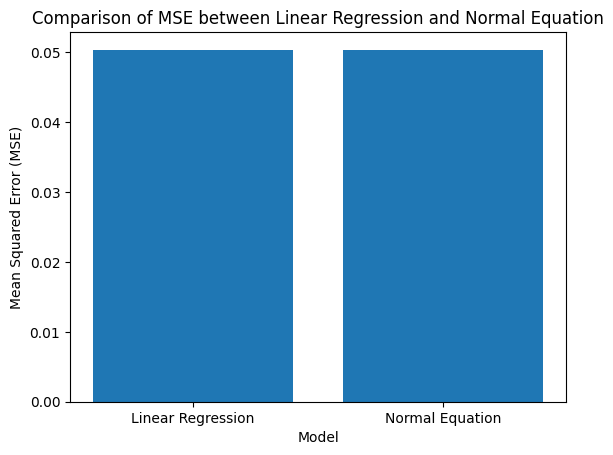

In [123]:
#  plot the mse of normal equation wrt linear regression

import matplotlib.pyplot as plt

# Assuming mse and mse_normal are already defined from previous code

# Create a list of MSE values
mse_values = [mse, mse_normal]
labels = ['Linear Regression', 'Normal Equation']

# Create the bar plot
plt.bar(labels, mse_values)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE between Linear Regression and Normal Equation')

# Display the plot
plt.show()


# 9. Performance Metrics and Computational Analysis

In [124]:
# --- Corrected Evaluation Function ---
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # 1. Train & Predict
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test)
    
    # 2. Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    training_time = end_time - start_time
    
    # 3. Safe Parameter Extraction (Fixes the AttributeError)
    best_param = "N/A"
    
    # We use hasattr to check if it's a pipeline before accessing named_steps
    if hasattr(model, 'named_steps'):
        if "ridgecv" in model.named_steps:
            best_param = f"Alpha: {model.named_steps['ridgecv'].alpha_:.4f}"
        elif "lassocv" in model.named_steps:
            best_param = f"Alpha: {model.named_steps['lassocv'].alpha_:.4f}"
        elif "elasticnetcv" in model.named_steps:
            best_param = f"L1 Ratio: {model.named_steps['elasticnetcv'].l1_ratio_}"

    return {
        'Model': model_name,
        'MSE': mse,
        'R2': r2,
        'Time (s)': training_time,
        'Best Param': best_param
    }

# --- Execution ---
results = []

# Evaluate all models
results.append(evaluate_model(linear_reg, X_train, y_train, X_test, y_test, "Linear (OLS)"))
results.append(evaluate_model(poly_pipeline, X_train, y_train, X_test, y_test, "Polynomial (Deg 2)"))
results.append(evaluate_model(ridge_pipeline, X_train, y_train, X_test, y_test, "Ridge (CV Tuned)"))
results.append(evaluate_model(lasso_pipeline, X_train, y_train, X_test, y_test, "Lasso (CV Tuned)"))
results.append(evaluate_model(elastic_pipeline, X_train, y_train, X_test, y_test, "Elastic Net (CV Tuned)"))
results.append(evaluate_model(sgd_pipeline, X_train, y_train, X_test, y_test, "Stochastic GD"))
results.append(evaluate_model(batch_pipeline, X_train, y_train, X_test, y_test, "Batch GD (Manual)"))

# Display Results Table
df_results = pd.DataFrame(results)
print("\n=== Model Performance Leaderboard ===")
print(df_results.sort_values(by='R2', ascending=False).to_string(index=False))


=== Model Performance Leaderboard ===
                 Model      MSE       R2  Time (s)    Best Param
    Polynomial (Deg 2) 0.038101 0.697714  0.272480           N/A
         Stochastic GD 0.049917 0.603976  0.039334           N/A
      Lasso (CV Tuned) 0.050022 0.603140  0.318336 Alpha: 0.0010
Elastic Net (CV Tuned) 0.050156 0.602075  0.328780 L1 Ratio: 0.1
      Ridge (CV Tuned) 0.050340 0.600618  0.124216 Alpha: 0.1000
          Linear (OLS) 0.050340 0.600616  0.004643           N/A
     Batch GD (Manual) 0.050887 0.596279  0.638062           N/A


/Users/debdeepdas/anaconda3/envs/tf-metal/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Decision Tree (Single model)
# We limit max_depth=5 to prevent it from memorizing noise (overfitting)
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# 2. Random Forest (Ensemble of models)
# n_estimators=100 means we average 100 different trees
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# --- Add to your existing evaluation loop ---
# Assuming 'results' list and 'evaluate_model' function exist from previous step

# Evaluate Decision Tree
result_dt = evaluate_model(dt_regressor, X_train, y_train, X_test, y_test, "Decision Tree")
results.append(result_dt)
# Evaluate Random Forest
result_rf = evaluate_model(rf_regressor, X_train, y_train, X_test, y_test, "Random Forest")
results.append(result_rf)
# Display New Leaderboard
df_results = pd.DataFrame(results)
print(df_results.sort_values(by='R2', ascending=False).to_string(index=False))

                 Model      MSE       R2  Time (s)    Best Param
         Random Forest 0.025728 0.795877  4.324437           N/A
    Polynomial (Deg 2) 0.038101 0.697714  0.272480           N/A
         Decision Tree 0.049378 0.608251  0.052548           N/A
         Stochastic GD 0.049917 0.603976  0.039334           N/A
      Lasso (CV Tuned) 0.050022 0.603140  0.318336 Alpha: 0.0010
Elastic Net (CV Tuned) 0.050156 0.602075  0.328780 L1 Ratio: 0.1
      Ridge (CV Tuned) 0.050340 0.600618  0.124216 Alpha: 0.1000
          Linear (OLS) 0.050340 0.600616  0.004643           N/A
     Batch GD (Manual) 0.050887 0.596279  0.638062           N/A


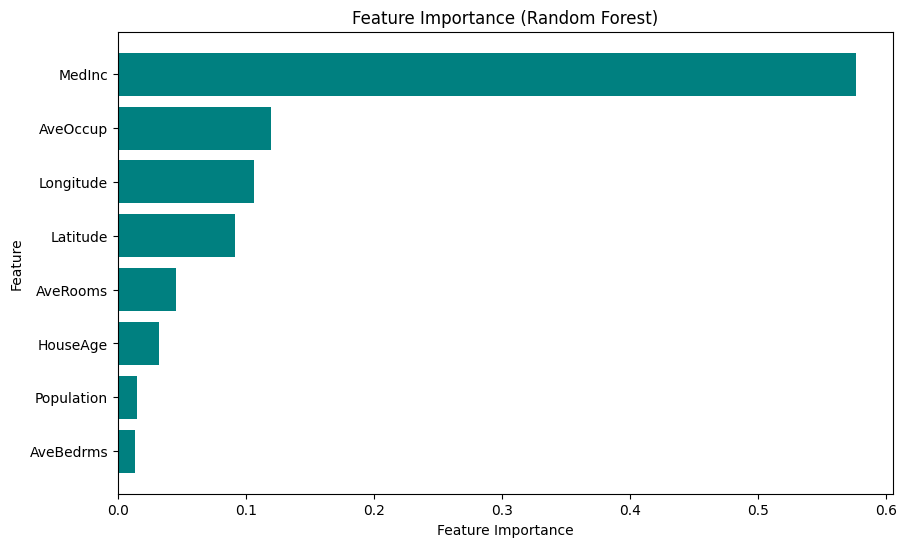

In [126]:
# Get feature importances
importances = rf_regressor.feature_importances_
feature_names = df.columns[:-1]  # Excluding the target column 'MEDV'

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [127]:
from sklearn.svm import SVR

# 1. Initialize SVR
# kernel='rbf' allows it to fit curves (non-linear)
# C=100 gives the model freedom to fit the data closely (less regularization)
# epsilon=0.1 defines the "margin of tolerance" where no penalty is given to errors
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))

# 2. Evaluate
result_svr = evaluate_model(svr_pipeline, X_train, y_train, X_test, y_test, "Support Vector Reg (RBF)")
results.append(result_svr)

# 3. Final Leaderboard
df_results = pd.DataFrame(results)
print(df_results.sort_values(by='R2', ascending=False).to_string(index=False))

                   Model      MSE       R2  Time (s)    Best Param
           Random Forest 0.025728 0.795877  4.324437           N/A
Support Vector Reg (RBF) 0.028226 0.776065 23.572589           N/A
      Polynomial (Deg 2) 0.038101 0.697714  0.272480           N/A
           Decision Tree 0.049378 0.608251  0.052548           N/A
           Stochastic GD 0.049917 0.603976  0.039334           N/A
        Lasso (CV Tuned) 0.050022 0.603140  0.318336 Alpha: 0.0010
  Elastic Net (CV Tuned) 0.050156 0.602075  0.328780 L1 Ratio: 0.1
        Ridge (CV Tuned) 0.050340 0.600618  0.124216 Alpha: 0.1000
            Linear (OLS) 0.050340 0.600616  0.004643           N/A
       Batch GD (Manual) 0.050887 0.596279  0.638062           N/A


In [128]:
from sklearn.model_selection import GridSearchCV

# 1. Define the "Grid" of hyperparameters to test
# We will test 3 x 3 x 2 = 18 different combinations
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20],         # How deep each tree can grow
    'min_samples_split': [2, 5]          # Minimum samples required to split a node
}

# 2. Initialize Grid Search
# cv=3 means it uses 3-Fold Cross Validation for every combination (robust testing)
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,  # Use all CPU cores to speed it up
    verbose=2
)

# 3. Fit the Grid (This will take a moment as it builds ~50+ forests!)
print("Starting Grid Search to optimize Random Forest...")
grid_search.fit(X_train, y_train)

# 4. Get the Winner
best_rf = grid_search.best_estimator_
print(f"\nBest Parameters Found: {grid_search.best_params_}")

# 5. Final Evaluation
y_pred_optimized = best_rf.predict(X_test)
r2_opt = r2_score(y_test, y_pred_optimized)
mse_opt = mean_squared_error(y_test, y_pred_optimized)

print(f"Optimized Random Forest R²: {r2_opt:.5f}")
print(f"Improvement over base model: {r2_opt - 0.795877:.5f}")

Starting Grid Search to optimize Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   2.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   2.7s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   2.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.7s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; tot

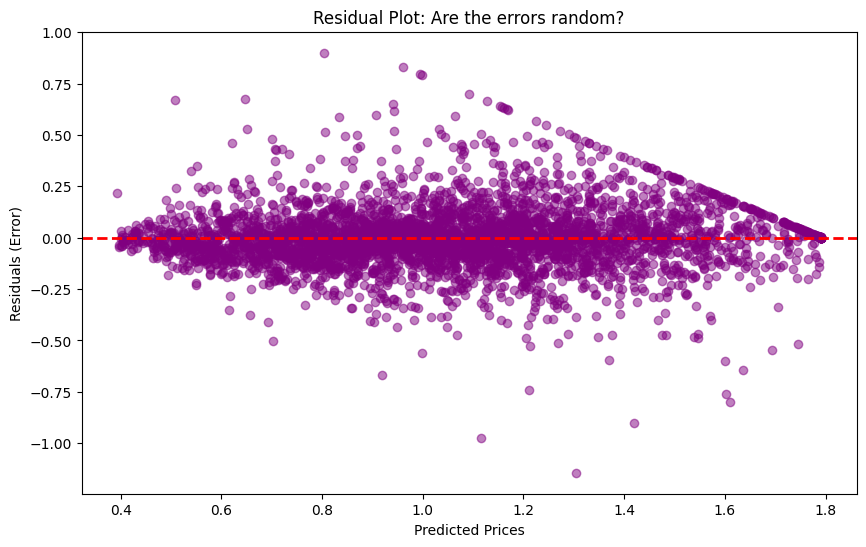

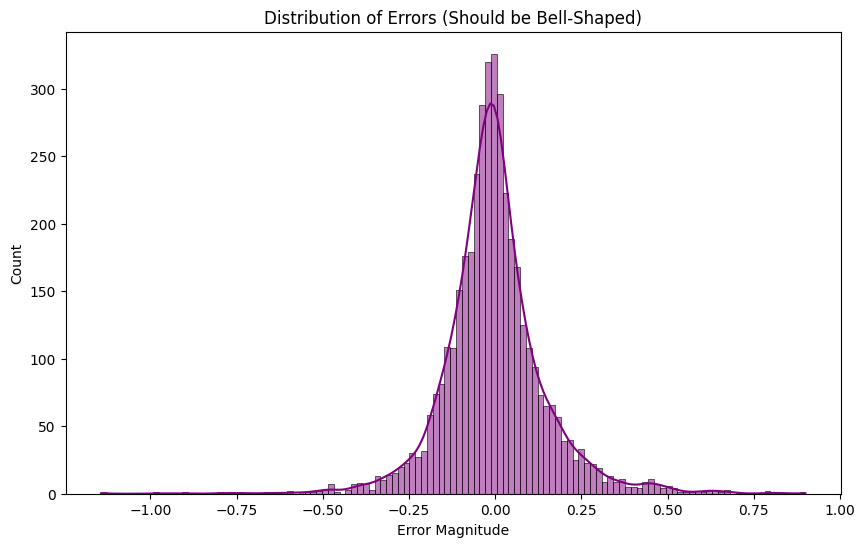

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Residuals
residuals = y_test - y_pred_optimized

# 2. Plot Predicted vs. Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_optimized, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # The "Perfect Prediction" line
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot: Are the errors random?')
plt.show()

# 3. Distribution of Errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Errors (Should be Bell-Shaped)')
plt.xlabel('Error Magnitude')
plt.show()

In [130]:
from xgboost import XGBRegressor
import pandas as pd

# 1. Initialize XGBoost (Standard setup)
# We remove 'early_stopping_rounds' to ensure compatibility with your evaluate_model function.
# n_estimators=1000 is high, but XGBoost is fast enough to handle it.
xgb_regressor = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

# 2. Evaluate using your existing function
# This will handle the .fit() and .predict() automatically
result_xgb = evaluate_model(xgb_regressor, X_train, y_train, X_test, y_test, "XGBoost")

# 3. Add to results and Print Leaderboard
results.append(result_xgb)
df_results = pd.DataFrame(results)

print("\n=== FINAL LEADERBOARD (With XGBoost) ===")
print(df_results.sort_values(by='R2', ascending=False).to_string(index=False))


=== FINAL LEADERBOARD (With XGBoost) ===
                   Model      MSE       R2  Time (s)    Best Param
                 XGBoost 0.018033 0.856929  1.061163           N/A
           Random Forest 0.025728 0.795877  4.324437           N/A
Support Vector Reg (RBF) 0.028226 0.776065 23.572589           N/A
      Polynomial (Deg 2) 0.038101 0.697714  0.272480           N/A
           Decision Tree 0.049378 0.608251  0.052548           N/A
           Stochastic GD 0.049917 0.603976  0.039334           N/A
        Lasso (CV Tuned) 0.050022 0.603140  0.318336 Alpha: 0.0010
  Elastic Net (CV Tuned) 0.050156 0.602075  0.328780 L1 Ratio: 0.1
        Ridge (CV Tuned) 0.050340 0.600618  0.124216 Alpha: 0.1000
            Linear (OLS) 0.050340 0.600616  0.004643           N/A
       Batch GD (Manual) 0.050887 0.596279  0.638062           N/A


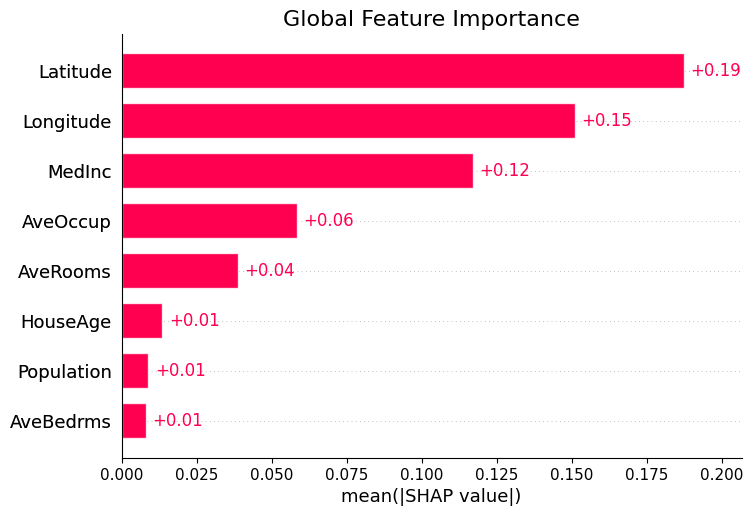

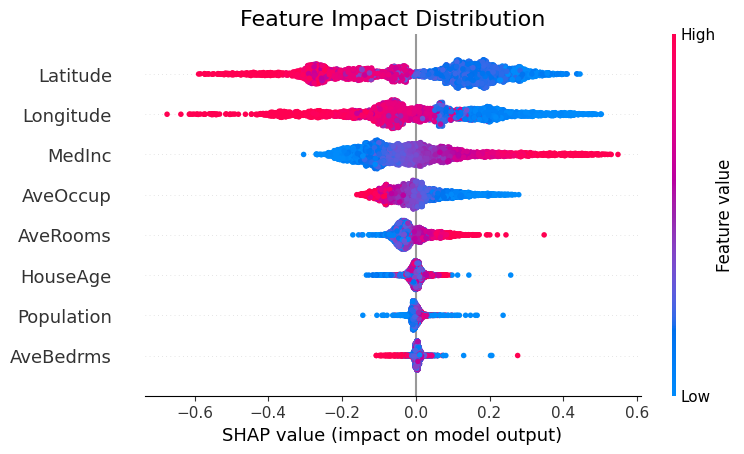

Generating Dependence Plot for top feature: Latitude


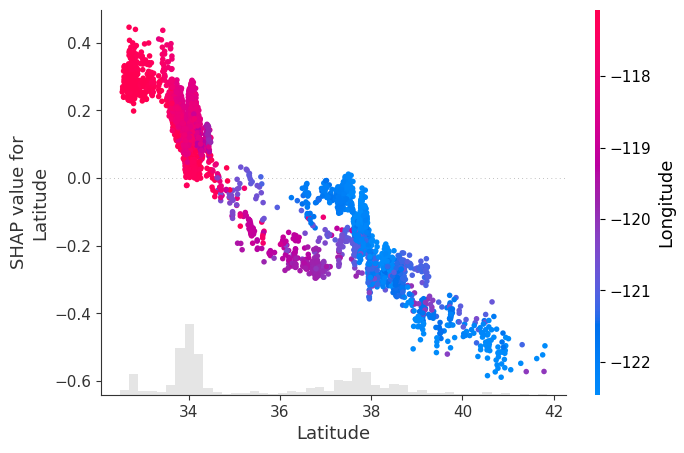

Explaining the prediction for the first house in the test set:


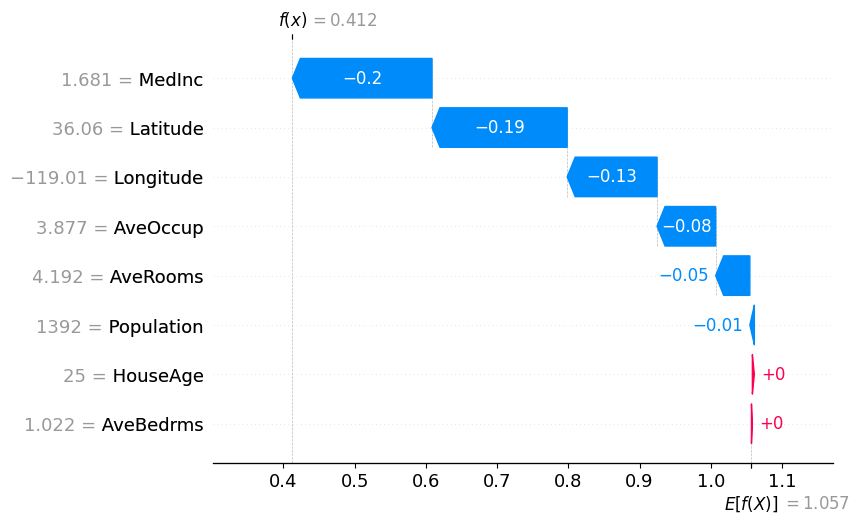

In [131]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Initialize the Modern Explainer ---
explainer = shap.TreeExplainer(xgb_regressor)
shap_values = explainer(X_test)

# --- 2. Plot A: Global Importance (Bar) ---
plt.figure(figsize=(10, 6))
plt.title("Global Feature Importance", fontsize=16)
shap.plots.bar(shap_values, max_display=10, show=False)
plt.show()

# --- 3. Plot B: Directionality (Beeswarm) ---
plt.figure(figsize=(10, 6))
plt.title("Feature Impact Distribution", fontsize=16)
shap.plots.beeswarm(shap_values, max_display=10, show=False)
plt.show()

# --- 4. Plot C: Non-Linearity (Dependence Plot) ---
# FIX APPLIED HERE: Added .values before .argmax()
top_feature_index = shap_values.abs.mean(0).values.argmax()

# Get the feature name
if hasattr(X_test, 'columns'):
    top_feature_name = X_test.columns[top_feature_index]
else:
    top_feature_name = top_feature_index

print(f"Generating Dependence Plot for top feature: {top_feature_name}")
# Note: scatter plot handles the Explanation object directly, no need for .values here
shap.plots.scatter(shap_values[:, top_feature_name], color=shap_values)

# --- 5. Plot D: Individual Case (Waterfall) ---
print("Explaining the prediction for the first house in the test set:")
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_values[0], show=False)
plt.show()